<a href="https://colab.research.google.com/github/ChoeTaeBin/Machine-Learnig/blob/main/KNeighborsClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#생선의 길이, 무게를 리스트로 준비
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = np.column_stack((fish_length, fish_weight)) #넘파이 배열로 만듬 1열: 길이, 2열: 무게
fish_target = np.concatenate((np.ones(35),np.zeros(14))) #앞의 35개가 양성 클래스

print(fish_data[:10])
print(fish_target[:10])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]
 [ 29.7 450. ]
 [ 29.7 500. ]
 [ 30.  390. ]
 [ 30.  450. ]
 [ 30.7 500. ]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [6]:
#훈련 세트, 테스트 세트 나누기
from sklearn.model_selection import train_test_split
#stratify = fish_target으로 target을 전달해주면 클래스 비율에 맞게 분할함
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target)
print(test_target)#비율이 맞는지 확인

[1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.]


In [9]:
#데이터 전처리(표준점수로 스테일 맞추기)

#1. 훈련세트의 평균, 표준편차를 구함
mean = np.mean(train_input,axis=0)
std = np.std(train_input, axis=0)

#2. 스케일 맞추기
train_scaled = (train_input - mean) / std #broadcasting이용
test_scaled  = (test_input - mean) / std #훈련 세트 데이터로 정규화!
new = ([25,150] - mean) / std #수상한 생선(훈련 세트 데이터로 정규화!)

In [10]:
#모델 훈련 하기
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_scaled,train_target) #훈련
kn.score(test_scaled, test_target) #평가

1.0

In [16]:
#수상한 생선 클래스 분류
distances, indexes = kn.kneighbors([new]) #이웃 정보
print('수상한 생선은: ', kn.predict([new]))
print('근거: ', train_target[indexes])

수상한 생선은:  [1.]
근거:  [[1. 1. 1. 1. 0.]]


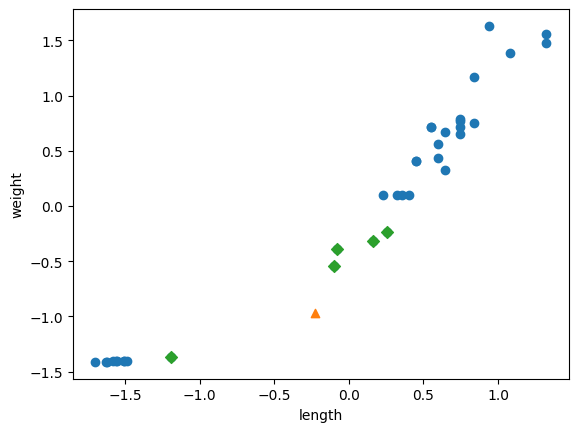

In [15]:
#산점도 확인

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes, 1], marker = 'D') #판단의 근거가 된 이웃들
plt.xlabel('length')
plt.ylabel('weight')
plt.show()